# Hodgkin Huxley Equation
- Hodgkin 和 Huxley 通过电压钳实验得出了 $\text{K}^{+}$ 和 $\text{Na}^{+}$ 通道（电压门控）的电导表达式
  $$ g_{\text{ K }} = \bar{g}_{\text{ K }}n^{4} \quad\text{and}\quad g_{\text{ Na }} = \bar{g}_{\text{ Na }}m^{3}h \tag{2.20} $$
	- 其中 $\bar{g}_{\text{ K }},\,\bar{g}_{\text{ Na }}$ 分别表示 $\text{ K }^{+}$ 和 $\text{ Na }^{+}$ 通道的最大电导。而 $n,\,m,\,h$ 为门控变量，其取值介于 $0$，$1$ 之间。$n^{4}$ 表示 $\text{ K }^{+}$ 通道打开的概率：$\text{ K }^{+}$ 通道由四个独立且完全相同的部分组成；而 $m^{3}$ 表示 $\text{ Na }^{+}$ 通道中的 activation gate 打开的概率，$h$ 表示 $\text{ Na }^{+}$ 通道中的 inactivation gate 打开的概率。
	- 类似于 [[C02 神经元的电导模型#^eq2172|式(2.17.2)]]，$n,\,m,\,h$ 满足如下一阶微分方程
	  $$ \begin{split} \frac{\text{d}n}{\text{d}t} & = \alpha_{n}(V)(1-n) - \beta_{n}(V)(n) = (n_{\infty}(V)-n) / \tau_{n}(V)\\ \frac{\text{d}m}{\text{d}t} & = \alpha_{m}(V)(1-m) - \beta_{m}(V)(m) = (m_{\infty}(V)-m) / \tau_{m}(V)\\ \frac{\text{d}h}{\text{d}t} & = \alpha_{h}(V)(1-h) - \beta_{h}(V)(h) = (h_{\infty}(V)-h) / \tau_{h}(V)\\ \end{split} $$
		- 其中（令 $X = n,\,m \text{ or } h$）
		  $$ X_{\infty}(V) = \frac{\alpha_{X}(V)}{\alpha_{X}(V)+\beta_{X}(V)} \quad\text{and}\quad \tau_{X}(V) = \frac{1}{\alpha_{X}(V)+\beta_{X}(V)} $$

- 通过拟合具体数据，Hodgkin 和 Huxley 选择如下参数：
	- 电导：$\bar{g}_{\text{ Na }} =120 \mathrm{\,mS/cm^{3}},\,\bar{g}_{\text{ K }} =36 \mathrm{\,mS/cm^{3}},\,\bar{g}_{\text{ L }} =0.3 \mathrm{\,mS/cm^{3}}$
	- 电压：$E_{\text{ Na }} = 50\mathrm{\,mV},\, E_{\text{ K }} = -77 \mathrm{\,mV},\, E_{\text{ L }} = -54.4 \mathrm{\, mV}$
	  $$ \begin{split} \alpha_{n}(V) & = 0.01(V+55) / (1 - \exp(-(V+55) / 10)) \\ \beta_{n}(V) & = 0.125 \exp(-(V+65)/80) \\ \\ \alpha_{m}(V) & = 0.1(V+40) / (1 - \exp(-(V+40) / 10)) \\ \beta_{m}(V) & = 4 \exp(-(V+65)/18) \\ \\ \alpha_{h}(V) & = 0.07\exp(-(V+65) / 20) \\ \beta_{h}(V) & = 1 / (1+\exp(-(V+35) /10)) \end{split} $$



In [1]:
ḡ_Na, ḡ_K, ḡ_L = 120, 36, 0.3;      # define the maximum conductance
E_Na, E_K, E_L = 50, -77, -54.4;    # define the reversal potential


# define the gating transition rates
alpha_n(V) = 0.01*(V+55)/(1-exp(-(V+55)/10))
beta_n(V) = 0.125*exp(-(V+65)/80)

alpha_m(V) = 0.1*(V+40)/(1-exp(-(V+40)/10))
beta_m(V) = 4*exp(-(V+65)/18)

alpha_h(V) = 0.07*exp(-(V+65)/20)
beta_h(V) = 1/(1+exp(-(V+35)/10))

n_infty(V) = alpha_n(V)/(alpha_n(V)+beta_n(V))
m_infty(V) = alpha_m(V)/(alpha_m(V)+beta_m(V))
h_infty(V) = alpha_h(V)/(alpha_h(V)+beta_h(V))

tau_n(V) = 1 /  (alpha_n(V)+ beta_n(V))
tau_m(V) = 1 /  (alpha_m(V) + beta_m(V))
tau_h(V) = 1 /  (alpha_h(V) + beta_h(V))

tau_h (generic function with 1 method)

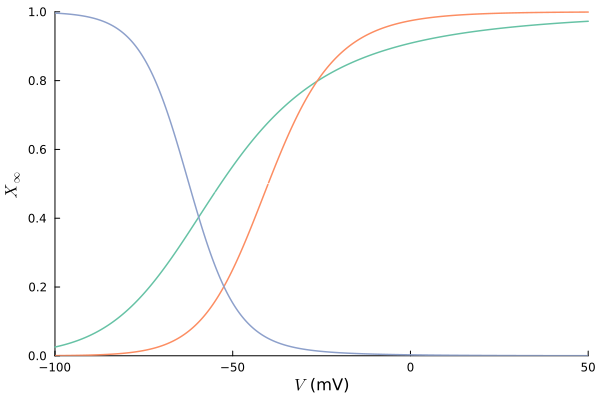

In [2]:
using Plots, LaTeXStrings

v = [-100:0.1:50...];

default()
default(
    lw = 1.5,
    grid = false,
    label="",
    xlims=(-100, 50), 
    ylims=(0, 1),
    palette=:Set2_7,
    xlabel = L"V"*" (mV)",
    ylabel = L"X_{\infty}",
    # size = (500,400)
    )
fig1 = plot(v, n_infty.(v))
plot!(v, m_infty.(v))
plot!(v, h_infty.(v))

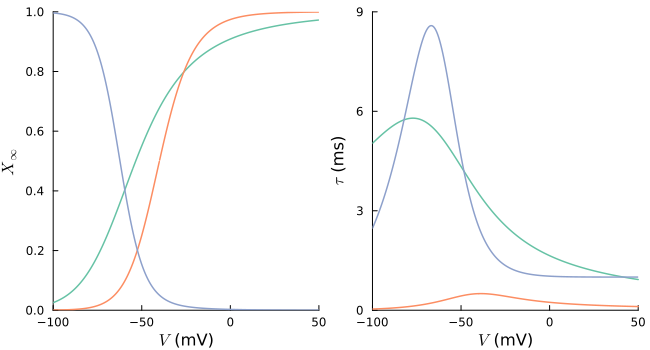

In [3]:
default()
default(
    lw = 1.5,
    grid = false,
    xlims=(-100, 50), 
    ylims=(0, 9),
    label="",
    # legend=:outerright,
    palette=:Set2_7,
    xlabel = L"V"* " (mV)",
    ylabel = L"\tau" * " (ms)",
    # size=(500,400)
    )
fig2 = plot(v, tau_n.(v) )
plot!(v, tau_m.(v))
plot!(v, tau_h.(v))

p = [fig1,fig2]

plot(p..., layout=(1,2),size=(650,350))

In [4]:
dn(V,n,dt) = dt*(alpha_n(V)*(1-n) - beta_n(V)*n);
dm(V,m,dt) = dt*(alpha_m(V)*(1-m) - beta_m(V)*m);
dh(V,h,dt) = dt*(alpha_h(V)*(1-h) - beta_h(V)*h);

Δt = 0.01
t = [0:Δt:6...]

m_t = []
n_t = []
h_t = []
for i in t
    if i <= 1
        push!(m_t, m_infty(-65))
        push!(n_t, n_infty(-65))
        push!(h_t, h_infty(-65))
        continue
    end
    # Δm = (m_infty(0) - m_t[end])/tau_m(0) * Δt;
    # Δn = (n_infty(0) - n_t[end])/tau_n(0) * Δt;
    # Δh = (h_infty(0) - h_t[end])/tau_h(0) * Δt;
    Δm = dm(0,m_t[end],Δt)
    Δn = dn(0,n_t[end],Δt)
    Δh = dh(0,h_t[end],Δt)
    push!(m_t, m_t[end] + Δm)
    push!(n_t, n_t[end] + Δn)
    push!(h_t, h_t[end] + Δh)
end


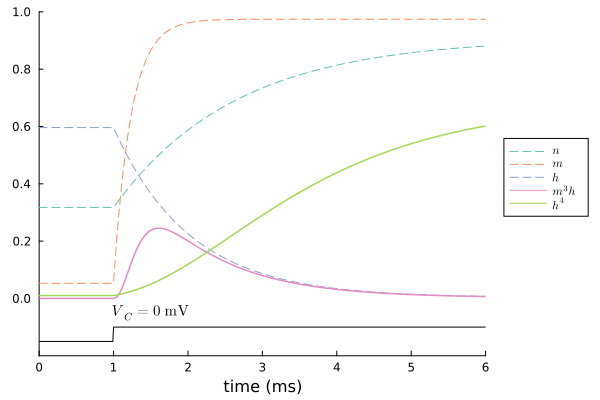

In [5]:
dn(V,n,dt) = dt*(alpha_n(V)*(1-n) - beta_n(V)*n);
dm(V,m,dt) = dt*(alpha_m(V)*(1-m) - beta_m(V)*m);
dh(V,h,dt) = dt*(alpha_h(V)*(1-h) - beta_h(V)*h);

default()
default(
    lw = 1.5,
    grid = false,
    label="",
    xlims=(0, 6), 
    ylims=(-0.2, 1),
    palette=:Set2_7,
    xlabel = "time (ms)",
    yticks = [0, 0.2,0.4,0.6,0.8,1],
    # size = (500,400)
    legend = :outerright
    )
fig3 = plot(t,n_t, ls=:dash, lw = 1, label = L"n")
plot!(t,m_t, ls=:dash, lw =1, label = L"m")
plot!(t,h_t, ls=:dash, lw =1, label = L"h")
plot!(t, m_t .^3 .* h_t, label=L"m^{3}h")
plot!(t, n_t .^ 4, label=L"h^{4}")
plot!(t, [i<1 ? -0.15 : -0.1 for i in t], c = :black,lw=1)
annotate!(1.5,-0.05,(L"V_{C} = 0 \mathrm{\ mV}",10))

# savefig(fig3,"/Users/zhengpanpan/Pictures/response_to_step_in_voltage.svg")


- 总之，HH模型为包含四个微分方程的系统
  $$ \begin{align} c_{\mathrm{M}} \frac{\mathrm{d}V}{\mathrm{d} t}  & = I_{\text{E}} - \bar{g}_{\mathrm{Na}}m^{3}h(V-E_{\mathrm{Na}}) - \bar{g}_{\mathrm{K}}n^{4}(V-E_{\mathrm{K}}) - \bar{g}_{\mathrm{L}}(V-E_{\mathrm{L}})\\ \frac{\text{d}n}{\text{d}t} & = \phi[\alpha_{n}(V)(1-n) - \beta_{n}(V)(n)] = \phi[(n_{\infty}(V)-n) / \tau_{n}(V)]\\ \frac{\text{d}m}{\text{d}t} & = \phi [\alpha_{m}(V)(1-m) - \beta_{m}(V)(m)] = \phi [(m_{\infty}(V)-m) / \tau_{m}(V)]\\ \frac{\text{d}h}{\text{d}t} & = \phi[\alpha_{h}(V)(1-h) - \beta_{h}(V)(h)] = \phi[(h_{\infty}(V)-h) / \tau_{h}(V)]\\ \end{align}\tag{2.21} $$
	- 此处，我们加入了一个温度变量 $\phi$，这是由于离子通道开关的变化速率会随着实验温度而发生改变，温度越高会有更高的变化速率。
	  $$
		\phi = Q_{10}^{(T - T_{\mathrm{base}}) / 10}  \tag{2.21.a} 
		$$
		- $Q_{10}$ 是速率随温度每上升 $10\mathrm{ \degree C}$ 的变化，对于大王乌贼的轴突而言，$T_{\text{base}} = 6.3\mathrm{ \degree C}$ 且 $Q_{10} = 3$


In [6]:
using Base: @kwdef
using Parameters: @unpack
using Plots, LaTeXStrings

# construct type HHParameter which is consisted of the steady parameter of HH model
@kwdef struct HHParameter{FT}
    Cm::FT = 1.0;   # define the membrane capacitance
    gNa::FT = 120; gK::FT = 36; gL::FT = 0.3;   # define the maximum conductance
    ENa::FT = 50; EK::FT = -77; EL::FT = -54.4; # define the Nernst potential
end


# construct type HH which is consisted of the HH model
@kwdef mutable struct HH{FT}
    param::HHParameter = HHParameter{FT}()
    N::UInt16   # the number of neurons
    v::Vector{FT} = fill(-65, N)    # the voltage of membrane
    m::Vector{FT} = fill(0.05,N); h::Vector{FT} = fill(0.6,N); n::Vector{FT} = fill(0.32,N); # the gating value
end

In [7]:
# define the alpha and beta function of n, m and h
## begin 
alpha_n(V) = 0.01*(V+55)/(1-exp(-(V+55)/10))
beta_n(V) = 0.125*exp(-(V+65)/80)
alpha_m(V) = 0.1*(V+40)/(1-exp(-(V+40)/10))
beta_m(V) = 4*exp(-(V+65)/18)
alpha_h(V) = 0.07*exp(-(V+65)/20)
beta_h(V) = 1/(1+exp(-(V+35)/10))
## end

# define the update HH according to the time
function update!(variable::HH, param::HHParameter, Ie::Vector, dt)
    @unpack N,v,m,h,n = variable
    @unpack Cm, gNa, gK, gL, ENa, EK, EL = param
    
    # use the property of ::Array type, which just give a point to the memory of the array, therefore, the change in new variable will make the old variable change
    @inbounds for i in 1:N
        m[i] += dt * ((alpha_m(v[i])*(1-m[i])) - (beta_m(v[i])*m[i]))
        n[i] += dt * ((alpha_n(v[i])*(1-n[i])) - (beta_n(v[i])*n[i]))
        h[i] += dt * ((alpha_h(v[i])*(1-h[i])) - (beta_h(v[i])*h[i]))
        v[i] += dt / Cm * (Ie[i] - gNa * m[i]^3 * h[i] * (v[i] - ENa) - gK * n[i]^4 * (v[i] - EK) - gL * (v[i] - EL))
    end
end


update! (generic function with 1 method)

In [8]:
T = 450     # total time 
dt = 0.05   # time step
nt = Int(T/dt) # number of time step
N=1 # set the number of neuron is 1

t = (1:nt)*dt # define the time array
Ie = repeat(10f0 * ((t .> 50) - (t .> 200)) + 35f0 * ((t .> 250) - (t .> 400)), 1, N);  # define the input current array
varr, gatearr = zeros(nt,N), zeros(nt,3,N) # define the array to store the result (varr is used to contain the result of membrane voltage, gatearr is used to contain the result of gating value)

neurons = HH{Float64}(N=N) # initial a neuron

# evolve the HH model
@time for i =1:nt
    update!(neurons, neurons.param, Ie[i,:], dt)
    varr[i,:] = neurons.v
    gatearr[i,:,:] .= [neurons.m;neurons.n;neurons.h]
end


  0.157121 seconds (647.83 k allocations: 35.200 MiB, 5.85% gc time, 87.14% compilation time)


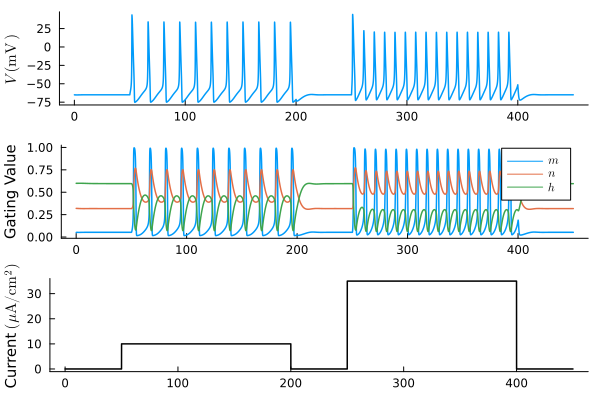

In [9]:
default()
default(
    label="",
    lw = 1.5,
    ytickfontsize=8,
    ylabelfontsize=10,
    grid = false
    )
fig1 = plot(t, varr[:,1], ylabel=L"V \mathrm{\ (mV)}");
fig2 = plot();
labels = [L"m" L"n" L"h"]
for i in 1:3
    plot!(t,gatearr[:, i, 1],
     label=labels[i],
     ylabel="Gating Value",
     )
end
fig3 = plot(t, Ie, c=:black,ylabel="Current "*L"(\mathrm{\mu A/ cm^{2}})")
fig_all = plot(fig1,fig2,fig3,layout=[1,1,1])

# savefig(fig_all, "/Users/zhengpanpan/Pictures/HH_model.svg")

- 判断一个 Spike 的方法：若膜电位从负跳到正，则说明存在一次 spkie

In [10]:
spike = (varr[1:nt-1, :] .< 0) .& (varr[2:nt, :] .> 0) # use bitwise and operator to find the spike (if the last voltage is negative and the next is positive then the neuron spike)
num_spikes = sum(spike, dims=1)
println("Num. of spikes : ", num_spikes[1])

Num. of spikes : 27


In [10]:
# generate a Fourier transform of the voltage

using FFTW

function fft_plot(t, v, dt)
    nt = length(t)
    freq = fftfreq(nt, dt)
    freq = fftshift(freq)
    v_fft = fft(v)
    v_fft = fftshift(v_fft)
    plot(freq, abs.(v_fft), label="", xlabel="Frequency (Hz)", ylabel="Power Spectrum")
end


default()
